0.05 0.1`
0.05 0.3`
0.05 0.5`
0.05 0.7`
0.05 0.9`


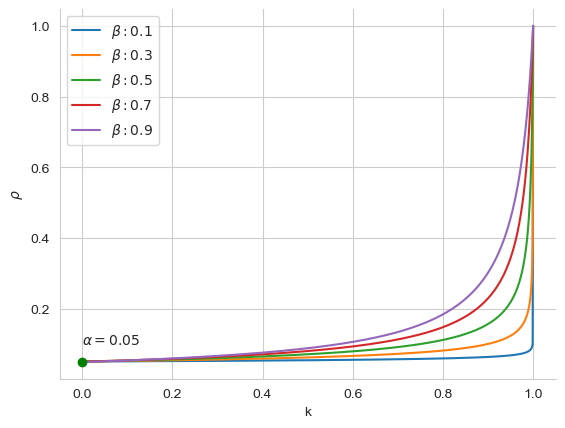

shape: cube
shape: sphere
shape: cylinder
shape: tetrahedron
shape: cone
shape: rbc_normal
shape: sickle_red_blood_cell


In [1]:
from irregular_object_packing.mesh.shapes import ALL_SHAPES, get_pv_manifold_shape
import pyvista as pv
from time import sleep
from irregular_object_packing.packing.optimizer import Optimizer
from irregular_object_packing.packing.optimizer_data import SimConfig
SimConfig


for shape in ALL_SHAPES:
    print("shape:", shape)

In [2]:
from irregular_object_packing.cat.chordal_axis_transform import compute_cdt
from irregular_object_packing.mesh.transform import scale_and_center_mesh
from irregular_object_packing.mesh.utils import polydata_from_cat_cell
from irregular_object_packing.performance_analysis.search_parameters import CASE_TRIVIAL_SHAPES

shape = "cube"
for shape in CASE_TRIVIAL_SHAPES['shape']:
    mesh0 = get_pv_manifold_shape(shape, "../data")
    container = get_pv_manifold_shape(shape, "../data")

    pltr = pv.Plotter()

    coverage = 0.8

    container_volume = 10
    mesh_volume = container_volume * coverage
    container = scale_and_center_mesh(container, container_volume)
    mesh0 = scale_and_center_mesh(mesh0, mesh_volume)

    opt = Optimizer(mesh0, container, SimConfig(r=coverage, n_threads=1, init_f=0.05, sampling_disabled=True), "trivial shapes")
    opt.setup()
    
    mesh0 = opt.current_meshes()[0].copy()

    plotter = pv.Plotter()
    opt.objects = opt.current_meshes()
    mesh = opt.current_meshes()[0]
    tetmesh0 = compute_cdt(opt.current_meshes() + [opt.container])
    cat0 = polydata_from_cat_cell(opt.compute_cat_cells(tetmesh0)[1][0])
    cat = cat0.copy()

    plotter.add_mesh(mesh, color="red", opacity=0.99, show_edges=True)
    plotter.add_mesh(cat, color="yellow", opacity=0.8, show_edges=True)
    plotter.add_mesh(opt.container, color="white", opacity=0.5, show_edges=True)
    plotter.show(interactive_update=True)
    for i in range(9):
        opt.i_b = i
        while True:
            opt.perform_optimisation_iteration()
            cat_mesh = polydata_from_cat_cell(opt.cat_cells[0])
            if not cat_mesh.is_manifold:
                print("not manifold")
                i=9
                break
            cat.points = cat_mesh.points
            cat.faces = cat_mesh.faces
            plotter.update()
            mesh.points = opt.current_meshes()[0].points
            sleep(0.2)
            
            plotter.update()
            sleep(0.2)
            
            if opt.step_should_terminate():
                break


    plotter = pv.Plotter(shape=(1, 2), border=False)
    plotter.subplot(0, 0)
    plotter.add_mesh(mesh0, color="blue", opacity=1, show_edges=True)
    plotter.add_mesh(cat0, color="yellow", opacity=0.5, show_edges=True)
    plotter.add_mesh(opt.container, color="white", opacity=0.3, show_edges=False)
    plotter.isometric_view()

    plotter.subplot(0, 1)
    plotter.add_mesh(mesh, color="blue", opacity=1, show_edges=True)
    plotter.add_mesh(cat, color="yellow", opacity=0.5, show_edges=True)
    plotter.add_mesh(opt.container, color="white", opacity=0.3, show_edges=False)
    plotter.isometric_view()
    plotter.save_graphic(f"demo-trivial-shapes_{shape}.pdf")
    # plotter.screenshot(f"demo-trivial-shapes_{shape}.png")

Widget(value="<iframe src='http://localhost:55047/index.html?ui=P_0x15f0650f0_1&reconnect=auto' style='width: …

Optimization terminated successfully    (Exit mode 0)
            Current function value: -7.552712073139031
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.385039633370524
            Iterations: 7
            Function evaluations: 62
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.420592821922177
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.9649461362180147
            Iterations: 6
            Function evaluations: 49
            Gradient evaluations: 6
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.6922111230798529
            Iterations: 7
            Function evaluation

Widget(value="<iframe src='http://localhost:55047/index.html?ui=P_0x15f067a60_4&reconnect=auto' style='width: …

Optimization terminated successfully    (Exit mode 0)
            Current function value: -7.552710093904981
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.3850389680235424
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.420592030705812
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.9649458564622884
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.6922107466136695
            Iterations: 7
            Function evaluatio

Widget(value="<iframe src='http://localhost:55047/index.html?ui=P_0x15f0f0190_7&reconnect=auto' style='width: …

Optimization terminated successfully    (Exit mode 0)
            Current function value: -7.552712223975399
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.3850401073709144
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.420592740463748
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.964946455876404
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.6922110975217242
            Iterations: 6
            Function evaluation

Widget(value="<iframe src='http://localhost:55047/index.html?ui=P_0x17be00d00_10&reconnect=auto' style='width:…

Optimization terminated successfully    (Exit mode 0)
            Current function value: -7.552711145763085
            Iterations: 7
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.385039270219778
            Iterations: 7
            Function evaluations: 64
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2.4205922155106325
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.9649462279125873
            Iterations: 8
            Function evaluations: 56
            Gradient evaluations: 7
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.6922110154013248
            Iterations: 6
            Function evaluatio